In [114]:
from numpy.random import randint, rand

In [115]:
def fitness(individual, target):
    return -abs(target - int("".join(str(x) for x in individual), 2))

def measure_fitness(pop, target):
    scores = []
    for induvidual in pop:
        scores.append(fitness(induvidual, target))
    return scores

def selection(pop, scores, k=4):
    k_best = []
    for _ in range(k):
        best_induvidual = 0
        for i in range(len(pop)):
            if (scores[i] > scores[best_induvidual]):
                best_induvidual = i
        k_best.append(pop[best_induvidual])
        scores[best_induvidual] = -1000
    return k_best

def crossover(p1, p2, r_cross):
	c1, c2 = p1.copy(), p2.copy()
	if rand() < r_cross:
		pt = randint(1, len(p1)-2)
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return c1, c2

def combinations(parents, n_pop, r_cross, r_mut):
    children = []
    for i in range(0, n_pop, 2):
        p1, p2 = parents[i], parents[i+1]
        for c in crossover(p1, p2, r_cross):
            mutation(c, r_mut)
            children.append(c)
    return children

def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            bitstring[i] = 1 - bitstring[i]

# Oppgave 1.1

In [116]:
n_bits = 8
n_pop = 10
pop = []
pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
target = randint(0, 2**n_bits)
r_cross = .95
r_mut = 1.0 / float(n_bits)
print(f"Target = {target}")

# max iterations just in case
gen = 0
while fitness(k_best[0], target) != 0:
    scores = measure_fitness(pop, target)
    print(f"Gen {gen:02}:", end=" ")
    print(f"avg = {sum(scores)/len(pop):06}", end=", ")
    
    k_best = selection(pop, scores)
    print(f"best = {fitness(k_best[0], target):06}")

    if fitness(k_best[0], target) == 0:
        print(f"Value found: {''.join(map(str, k_best[0]))} == {target}")
        break

    parents = k_best
    for i in range(len(k_best)):
        parents.append(k_best[i])
    for i in range(len(k_best)):
        parents.append(k_best[i])

    pop = combinations(parents, n_pop, r_cross, r_mut)
    gen += 1


Target = 235
Gen 00: avg = -140.9, best = -00039
Gen 01: avg = -071.0, best = -00014
Gen 02: avg = -034.2, best = -00003
Gen 03: avg = -057.7, best = -00003
Gen 04: avg = -037.5, best = -00004
Gen 05: avg = -032.9, best = -00001
Gen 06: avg = -052.0, best = -00001
Gen 07: avg = -035.3, best = -00001
Gen 08: avg = -075.9, best = -00001
Gen 09: avg = -060.3, best = -00001
Gen 10: avg = -037.5, best = -00002
Gen 11: avg = -039.9, best = -00002
Gen 12: avg = -082.8, best = 000000
Value found: 11101011 == 235


# Oppgave 1.2

In [126]:
import time, math
import matplotlib.pyplot as plt

Testing with n_bits = 8...
Testing with n_bits = 9...
Testing with n_bits = 10...
Testing with n_bits = 11...
Testing with n_bits = 12...
Testing with n_bits = 13...
Testing with n_bits = 14...
Testing with n_bits = 15...
Testing with n_bits = 16...
Testing with n_bits = 17...
Testing with n_bits = 18...
Testing with n_bits = 19...
Testing with n_bits = 20...
Testing with n_bits = 21...


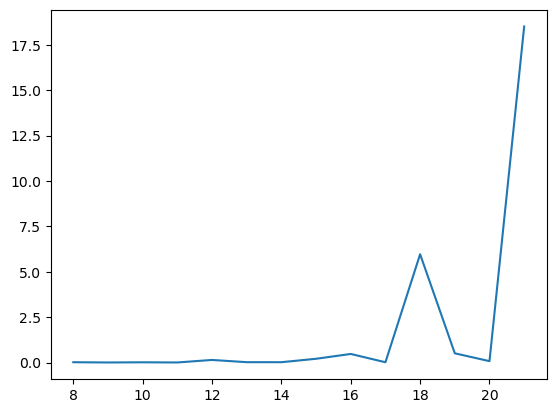

In [133]:
avgs = []
n_runs = 3
max_bits = 21
min_bits = 8
for n_bits in range(min_bits, max_bits+1):
    r_mut = 1.0 / float(n_bits)
    run_times = []
    print(f"Testing with n_bits = {n_bits}...")
    for run in range(n_runs):
        finished = True
        pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
        target = randint(0, 2**n_bits)
        start = time.time()
        while fitness(k_best[0], target) != 0:
            scores = measure_fitness(pop, target)
            k_best = selection(pop, scores)
            if fitness(k_best[0], target) == 0:
                break
            parents = k_best
            for i in range(len(k_best)):
                parents.append(k_best[i])
            for i in range(len(k_best)):
                parents.append(k_best[i])
            pop = combinations(parents, n_pop, r_cross, r_mut)
            if time.time() - start > 180_000: #dersom det tar lenger enn tre min, avbryt
                finished = False
                break
        end = time.time()
        if finished:
            run_times.append(end - start)
    avgs.append(sum(run_times) / len(run_times))

plt.plot(range(min_bits, max_bits+1), avgs)
plt.show()